# Black Friday Data Analysis

## 1.0 Preparation of the data set

In [1]:
# We installed the necessary libraries and dataset

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv("/kaggle/input/black-friday-sale/train.csv")

## 2.0 First look at the data

In [2]:
#Trying to create missing data in code
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

In [3]:
#Let's view the new dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001.0,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001.0,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,NaN,15200.0
2,1000001.0,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001.0,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002.0,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [4]:
#Let's check the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     533938 non-null  float64
 1   Product_ID                  533643 non-null  object 
 2   Gender                      533832 non-null  object 
 3   Age                         533858 non-null  object 
 4   Occupation                  533749 non-null  float64
 5   City_Category               533869 non-null  object 
 6   Stay_In_Current_City_Years  533619 non-null  object 
 7   Marital_Status              533901 non-null  float64
 8   Product_Category_1          533791 non-null  float64
 9   Product_Category_2          365314 non-null  float64
 10  Product_Category_3          161816 non-null  float64
 11  Purchase                    533774 non-null  float64
dtypes: float64(7), object(5)
memory usage: 50.4+ MB


In [5]:
# Prints the columns in the dataset.
print("Columns in the dataset:", list(df.columns), '\n')

# Let's access the number of columns.
print(f"There are a total of {len(df.columns)} columns in the dataset.\n")

# Observing the data type of the attributes and functions we often use is important to gain control over the code.
print(f"Type of 'columns' attribute in the dataset: {type(df.columns)}\n")


Columns in the dataset: ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase'] 

There are a total of 12 columns in the dataset.

Type of 'columns' attribute in the dataset: <class 'pandas.core.indexes.base.Index'>



In [6]:
# Separate columns into categorical and numerical features using list comprehension
categorical_features = [col for col in df.columns if df[col].dtype in ["object", "category"]]
numerical_features = [col for col in df.columns if df[col].dtype not in ["object", "category"]]
print("Categorical_features :",categorical_features)
print("Numerical_features :",numerical_features)

Categorical_features : ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
Numerical_features : ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [7]:
#Let's see the statistical values ​​in the column
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.339380e+05,533749.000000,533901.000000,533791.000000,365314.000000,161816.000000,533774.000000
mean,1.003029e+06,8.076671,0.409746,5.404677,9.842119,12.666782,9262.731529
std,1.727494e+03,6.523459,0.491787,3.936572,5.086150,4.126041,5023.041426
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5822.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8046.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12052.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
#Let's view the total number of NaN
df.isnull().sum()

User_ID                        16130
Product_ID                     16425
Gender                         16236
Age                            16210
Occupation                     16319
City_Category                  16199
Stay_In_Current_City_Years     16449
Marital_Status                 16167
Product_Category_1             16277
Product_Category_2            184754
Product_Category_3            388252
Purchase                       16294
dtype: int64

In [9]:
# Calculate missing and non-missing observations
missing_count = df.isnull().sum().sum()
non_missing_count = df.notnull().sum().sum()
total_count = df.size  # Total number of elements in the DataFrame

# Calculate the percentage of missing data
missing_percentage = (missing_count / total_count) * 100

# Print the results
print(f"The dataset contains {non_missing_count} non-missing observations and {missing_count} missing observations.")
print(f"Percentage of missing data: {missing_percentage:.2f}%")

The dataset contains 5865104 non-missing observations and 735712 missing observations.
Percentage of missing data: 11.15%


In [10]:
#Let's see the rows with no missing data.
df[df.notnull().all(axis = 1)][:5]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
13,1000005.0,P00145042,M,26-35,20.0,A,1,1.0,1.0,2.0,5.0,15665.0
14,1000006.0,P00231342,F,51-55,9.0,A,1,0.0,5.0,8.0,14.0,5378.0
16,1000006.0,P0096642,F,51-55,9.0,A,1,0.0,2.0,3.0,4.0,13055.0
18,1000007.0,P00036842,M,36-45,1.0,B,1,1.0,1.0,14.0,16.0,11788.0
19,1000008.0,P00249542,M,26-35,12.0,C,4+,1.0,1.0,5.0,15.0,19614.0


## 3.0 Filling in missing data

In [11]:
# Permanently drop rows where all values are missing
df=df.dropna(how='all')

In [12]:
# Fill missing values in each column with the most frequent value (mode)
# Define the columns where missing values need to be handled
columns_to_fill = ['Product_Category_2', 'Product_Category_3','Product_Category_1']

# Iterate through the list of columns
for col in columns_to_fill:
    # Fill missing values in the current column with its most frequent value (mode)
    df[col]=df[col].fillna(df[col].mode()[0])

# Check for any remaining missing values in the dataset
print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
User_ID                       16130
Product_ID                    16425
Gender                        16236
Age                           16210
Occupation                    16319
City_Category                 16199
Stay_In_Current_City_Years    16449
Marital_Status                16167
Product_Category_1                0
Product_Category_2                0
Product_Category_3                0
Purchase                      16294
dtype: int64


In [13]:
# Step 1: Calculate the mean of the "purchase" column
mean_purchase = df['Purchase'].mean()

# Step 2: Fill missing values (NaN) in the "purchase" column with the mean
df['Purchase']=df['Purchase'].fillna(value=mean_purchase)

# Step 3: Check for any remaining missing values
print("Missing values after filling:")
print(df.isna().sum())


Missing values after filling:
User_ID                       16130
Product_ID                    16425
Gender                        16236
Age                           16210
Occupation                    16319
City_Category                 16199
Stay_In_Current_City_Years    16449
Marital_Status                16167
Product_Category_1                0
Product_Category_2                0
Product_Category_3                0
Purchase                          0
dtype: int64


In [14]:
# Use ffill method directly to fill missing values in "User_ID" column
df["User_ID"] = df["User_ID"].ffill()

# Check for any remaining missing values
print("Missing values after filling:")
print(df.isna().sum())

Missing values after filling:
User_ID                           0
Product_ID                    16425
Gender                        16236
Age                           16210
Occupation                    16319
City_Category                 16199
Stay_In_Current_City_Years    16449
Marital_Status                16167
Product_Category_1                0
Product_Category_2                0
Product_Category_3                0
Purchase                          0
dtype: int64


In [15]:
#Let's use groupby function 

df["Product_ID"] = df.groupby("User_ID")["Product_ID"].transform(lambda x: x.fillna(x.mode()[0]))
df["Gender"] = df.groupby("User_ID")["Gender"].transform(lambda x: x.fillna(x.mode()[0]))

# Verify if missing values are filled
print(df.isnull().sum())

User_ID                           0
Product_ID                        0
Gender                            0
Age                           16210
Occupation                    16319
City_Category                 16199
Stay_In_Current_City_Years    16449
Marital_Status                16167
Product_Category_1                0
Product_Category_2                0
Product_Category_3                0
Purchase                          0
dtype: int64


In [16]:
# Replace 'F' with 1 and 'M' with 0 in the 'Gender' column
df['Gender'] = df['Gender'].replace({'F': 1, 'M': 0})

# Explicitly convert the 'Gender' column to integers to avoid downcasting warning
df['Gender'] = df['Gender'].astype(int)

# Verify the changes
print(df['Gender'].head())

0    1
1    1
2    1
3    1
4    0
Name: Gender, dtype: int64


/tmp/ipykernel_17/1983743517.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'F': 1, 'M': 0})


In [17]:
#Let's use groupby function 

df["Occupation"] = df.groupby("Gender")["Occupation"].transform(lambda x: x.fillna(x.mode()[0]))
df["Age"] = df.groupby("Gender")["Age"].transform(lambda x: x.fillna(x.mode()[0]))
df["Marital_Status"] = df.groupby(["Gender","Age","Occupation"])["Marital_Status"].transform(lambda x: x.fillna(x.mode()[0]))

# Verify if missing values are filled
print(df.isnull().sum())

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                 16199
Stay_In_Current_City_Years    16449
Marital_Status                    0
Product_Category_1                0
Product_Category_2                0
Product_Category_3                0
Purchase                          0
dtype: int64


In [18]:
# Get the unique values from the 'City_Category' column, excluding NaN values
categories = df['City_Category'].dropna().unique()

# Fill the 'NaN' values by randomly choosing from the available categories
df['City_Category'] = df['City_Category'].apply(lambda x: np.random.choice(categories) if pd.isna(x) else x)

# Verify if there are any missing values remaining
print(df.isnull().sum())

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years    16449
Marital_Status                    0
Product_Category_1                0
Product_Category_2                0
Product_Category_3                0
Purchase                          0
dtype: int64


In [19]:
from sklearn.impute import KNNImputer

# Convert 'Stay_In_Current_City_Years' column to categorical if not already
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

# Convert categorical values to numerical codes
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].cat.codes

# Use KNN to fill in missing values
imputer = KNNImputer(n_neighbors=3)
df['Stay_In_Current_City_Years'] = imputer.fit_transform(df[['Stay_In_Current_City_Years']])

# Replace negative values with zero
df['Stay_In_Current_City_Years'] = np.maximum(df['Stay_In_Current_City_Years'], 0)

# Convert the column back to categorical (optional, if you need categorical data)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

# Check if NaN values have been filled
print(df.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [20]:
#After filling in the NaN values, let's take a look at the data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001.0,P00069042,1,0-17,10.0,A,2.0,0.0,3.0,8.0,16.0,8370.0
1,1000001.0,P00248942,1,0-17,10.0,A,2.0,0.0,1.0,6.0,16.0,15200.0
2,1000001.0,P00087842,1,0-17,10.0,A,2.0,0.0,12.0,8.0,16.0,1422.0
3,1000001.0,P00085442,1,0-17,10.0,A,2.0,0.0,12.0,14.0,16.0,1057.0
4,1000002.0,P00285442,0,55+,16.0,C,4.0,0.0,8.0,8.0,16.0,7969.0


In [21]:
df["Gender"]=df["Gender"].replace({1:"F",0:"M"}) #Reinstate gender data 

In [22]:
#Let's check our data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  float64 
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  object  
 4   Occupation                  550068 non-null  float64 
 5   City_Category               550068 non-null  object  
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  float64 
 8   Product_Category_1          550068 non-null  float64 
 9   Product_Category_2          550068 non-null  float64 
 10  Product_Category_3          550068 non-null  float64 
 11  Purchase                    550068 non-null  float64 
dtypes: category(1), float64(7), object(4)
memory usage: 46.7+ 

In [23]:
# Let's use select_dtypes() to select variables that hold a specific data type.
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,Product_ID,Gender,Age,City_Category
0,P00069042,F,0-17,A
1,P00248942,F,0-17,A
2,P00087842,F,0-17,A


In [24]:
# We can use nunique() to see the number of unique values ​​in categorical variables.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 3627 unique values in "Product_ID" categorical feature.

There are 2 unique values in "Gender" categorical feature.

There are 7 unique values in "Age" categorical feature.

There are 3 unique values in "City_Category" categorical feature.



In [25]:
df_categorical.describe().T #Let's examine the statistical expressions of categorical data.

,count,unique,top,freq
Product_ID,550068,3627,P00000142,5709
Gender,550068,2,M,414253
Age,550068,7,26-35,229337
City_Category,550068,3,B,229774


In [26]:
# We can use the following structure to select numerical columns in the data set.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head(3)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001.0,10.0,0.0,3.0,8.0,16.0,8370.0
1,1000001.0,10.0,0.0,1.0,6.0,16.0,15200.0
2,1000001.0,10.0,0.0,12.0,8.0,16.0,1422.0


In [27]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591616,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,7.926938e+00,6.489494,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.039210e-01,0.490682,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.392702e+00,3.878498,1.0,2.0,5.0,8.0,20.0
Product_Category_2,550068.0,9.223398e+00,4.235225,2.0,8.0,8.0,14.0,18.0
Product_Category_3,550068.0,1.501945e+01,2.704622,3.0,16.0,16.0,16.0,18.0
Purchase,550068.0,9.262732e+03,4948.086296,12.0,5881.0,8104.0,11977.0,23961.0


## 4.0 Visualization of data

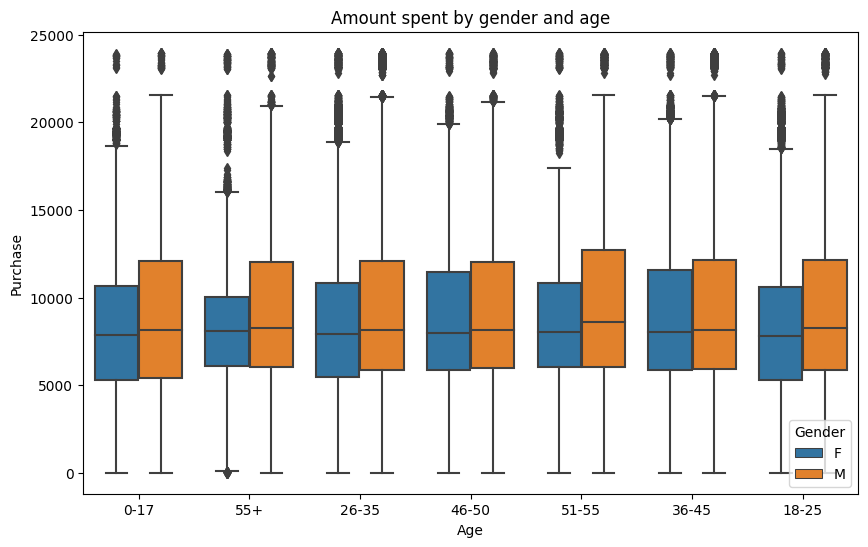

In [28]:
##Let's observe the difference in spending between men and women
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', hue='Gender', data=df)
plt.title('Amount spent by gender and age')
plt.show()

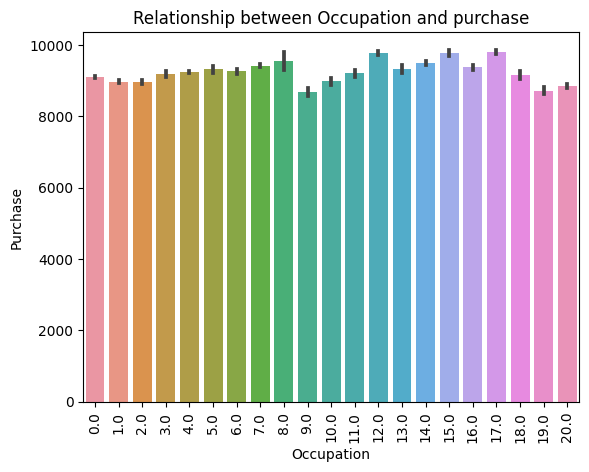

In [29]:
# Let's show the relationship between Occupation and spending amount
sns.barplot(x='Occupation', y='Purchase', data=df)
plt.title('Relationship between Occupation and purchase')
plt.xticks(rotation=90)
plt.show()

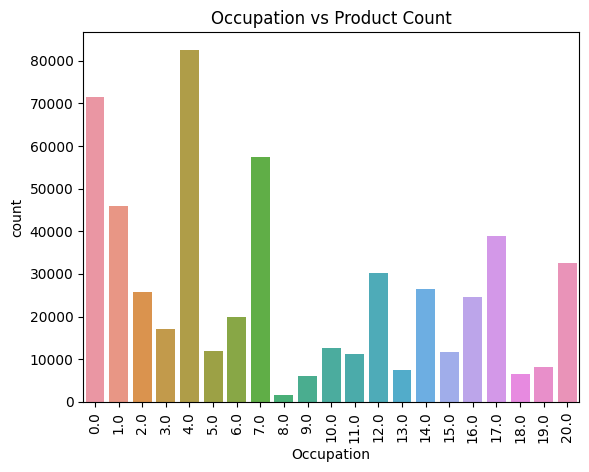

In [30]:
#Let's examine which professions receive how much product.
sns.countplot(x='Occupation', data=df)
plt.title('Occupation vs Product Count')
plt.xticks(rotation=90)
plt.show()

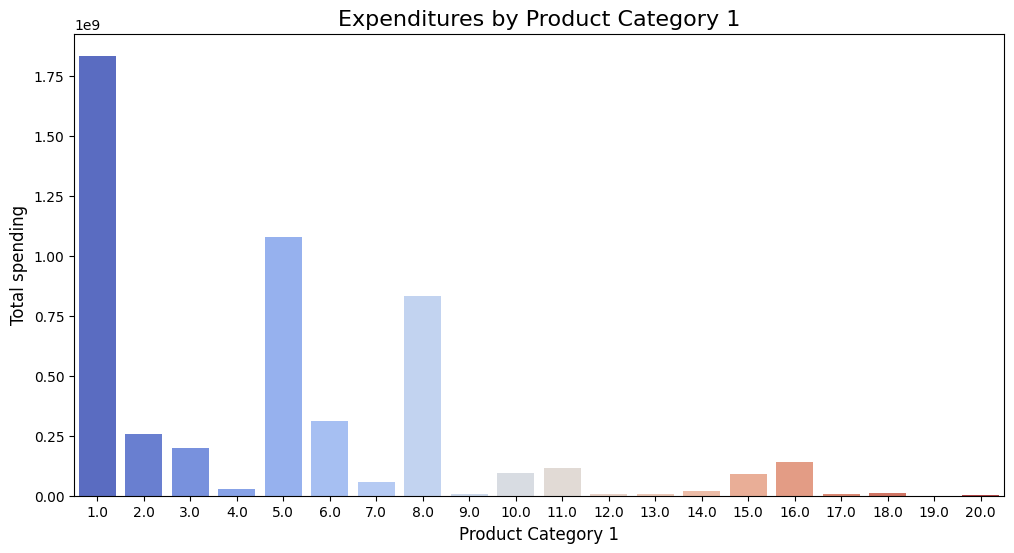

In [31]:
# Spending distributions by product category 1
plt.figure(figsize=(12, 6))
category_purchase = df.groupby('Product_Category_1')['Purchase'].sum().reset_index()
category_purchase = category_purchase.sort_values(by='Purchase', ascending=False)
sns.barplot(data=category_purchase, x='Product_Category_1', y='Purchase', palette='coolwarm')
plt.title('Expenditures by Product Category 1', fontsize=16)
plt.xlabel('Product Category 1', fontsize=12)
plt.ylabel('Total spending', fontsize=12)
plt.show()

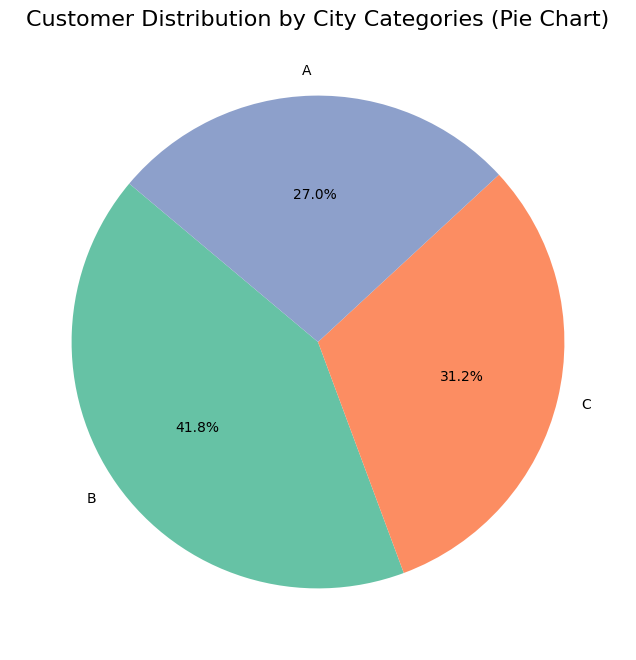

In [32]:
# Customer Distribution by City Categories (Pie Chart)
plt.figure(figsize=(8, 8))
city_distribution = df['City_Category'].value_counts()
city_distribution.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=140)
plt.title('Customer Distribution by City Categories (Pie Chart)', fontsize=16)
plt.ylabel('')
plt.show()

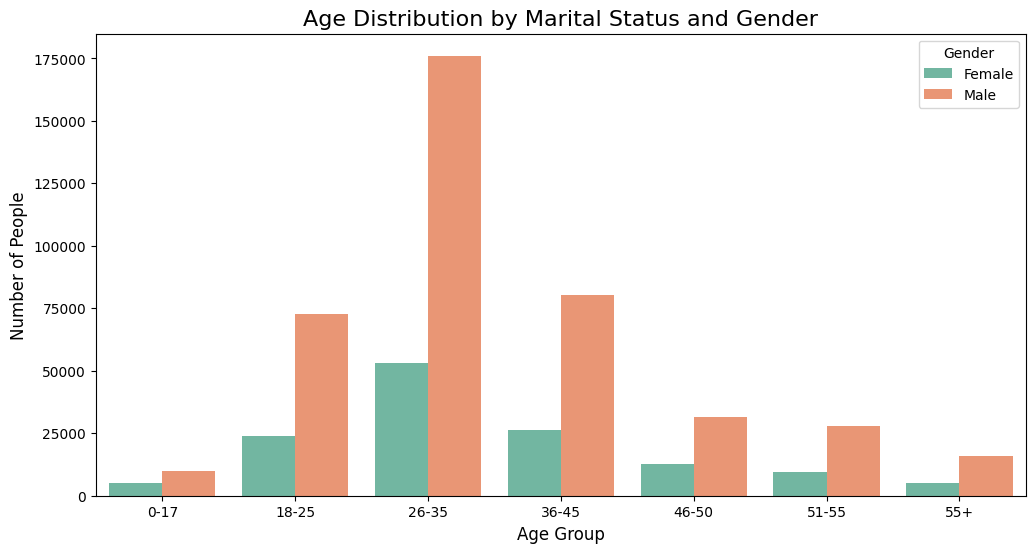

In [33]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a countplot to visualize the distribution of age groups by gender
sns.countplot(data=df, x='Age', hue='Gender', palette='Set2', 
              order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

# Add a title to the plot
plt.title('Age Distribution by Marital Status and Gender', fontsize=16)

# Label the x-axis
plt.xlabel('Age Group', fontsize=12)

# Label the y-axis
plt.ylabel('Number of People', fontsize=12)

# Add a legend to distinguish between genders
plt.legend(title='Gender', labels=['Female', 'Male'])

# Display the plot
plt.show()
